# Neutral density code development

In [25]:
import cf_xarray as cfxr
import dcpy
import numpy as np
import pygamma

import eddydiff
import xarray as xr

In [17]:
natre = xr.open_dataset("../datasets/natre_large_scale.nc").load()
natre = natre.cf.guess_coord_axis()
natre.depth.attrs["positive"] = "down"
natre["theta"] = dcpy.eos.ptmp(natre.salt, natre.temp, natre.pres, pr=1000)
natre["pden"] = dcpy.eos.pden(natre.salt, natre.temp, natre.pres, pr=1000)
natre

<xarray.Dataset>
Dimensions:             (depth: 7961, latitude: 10, longitude: 10)
Coordinates:
  * depth               (depth) float64 10.2 10.6 11.0 ... 3.194e+03 3.194e+03
  * latitude            (latitude) float64 27.5 27.1 26.7 ... 24.7 24.3 23.9
  * longitude           (longitude) float64 -30.7 -30.3 -29.8 ... -27.2 -26.8
    reference_pressure  int64 1000
Data variables:
    chi                 (latitude, longitude, depth) float64 nan nan ... nan nan
    eps                 (latitude, longitude, depth) float64 nan nan ... nan nan
    pres                (latitude, longitude, depth) float64 nan nan ... nan nan
    salt                (latitude, longitude, depth) float64 nan nan ... nan nan
    temp                (latitude, longitude, depth) float64 nan nan ... nan nan
    time                (latitude, longitude) datetime64[ns] 1992-03-28T15:28...
    theta               (latitude, longitude, depth) float64 nan nan ... nan nan
    pden                (latitude, longitude, depth) float64 nan nan ... nan nan
Attributes: (12/13)
    Conventions:           CF-1.6
    netcdf_version:        4
    project:               North Atlantic Tracer Release Experiment (NATRE)
    expocode:              32OC250_4
    cast_number:           3.0
    title:                 Microstructure profiler data from the ship Oceanus...
    ...                    ...
    latitude:              27.533166666666666
    longitude:             -30.723333333333333
    chief_scientist:       Raymond W. Schmitt
    data_originator:       Polzin
    institution:           WHOI
    data_assembly_center:  CCHDO

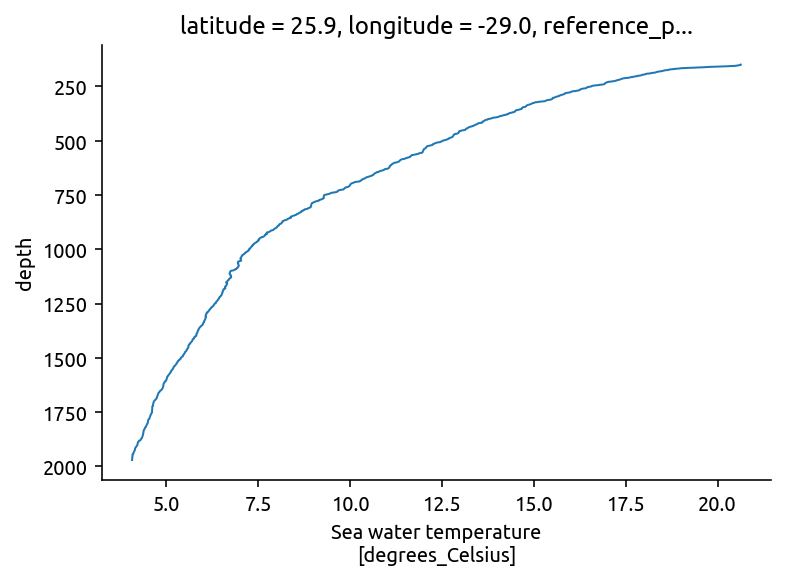

In [19]:
ds = natre.isel(latitude=4, longitude=4).interpolate_na("depth")
ds.temp.cf.plot()

In [59]:
natre["gamma_n"] = 

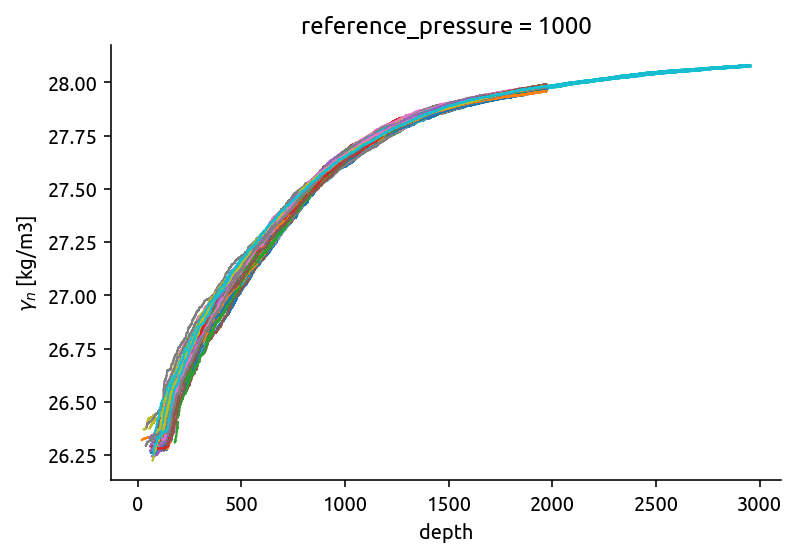

In [62]:
natre.gamma_n.stack({"latlon": ["latitude", "longitude"]}).drop_vars("latlon").plot(
    hue="latlon", add_legend=False
)

In [23]:
gamma = pygamma.gamma_n(ds.salt, ds.temp, ds.pres, ds.longitude, ds.latitude)[0]

In [31]:
import matplotlib.pyplot as plt